# Bootcamp 8: Practice with Pandas

This notebook is meant as a review of some of the more salient features of Pandas. To be clear, we will not be focusing on *reading in data*; rather, this notebook will focus more on using Pandas for selecting and analyzing data (using Pandas, of course). 

We’ll be using the same data set that you used for homework 3 (`americas_gpin_2014_16.csv`). We’re going to be looking for the agricultural commodity that has experienced the greatest growth over the course of the last ~50 years.

**NOTE** Before we dive too far into this, a quick note: part of this will involve using `polyfit`. So if you aren’t comfortable with those concepts, we recommend going to take a look at that notebook!

## Part 0: Importing Packages and Reading in the Data

As a first step, let’s import the necessary packages and read in the data. We’ll also add the `log10gpin` column that you used in HW 3, and do some rudimentary cleaning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gpin_data = pd.read_csv('./americas_gpin_2014_16.csv')
gpin_data['log10gpin'] = np.log10(gpin_data['gpin'])
gpin_data_cleaned = gpin_data.replace([np.inf, -np.inf], np.nan)
gpin_data_cleaned = gpin_data_cleaned.dropna(subset=['log10gpin'])

## Part 1: Analyzing a Single Agricultural Commodity

#### 1.1
&#9989;&nbsp; **Pick a single agricultural commodity (from the column name `item`). Create a new dataframe that just contains that commodity**

In [6]:
gpin_data_cleaned['item'].unique()
bananas=gpin_data_cleaned[gpin_data_cleaned['item']=='Bananas']


bananas.head()


,geo_area,item,year,gpin,log10gpin
121,Argentina,Bananas,1961,6.62,0.820858
122,Bahamas,Bananas,1961,34.69,1.540204
123,Barbados,Bananas,1961,222.37,2.347076
124,Belize,Bananas,1961,1.65,0.217484
125,Bolivia (Plurinational State of),Bananas,1961,36.00,1.556303


#### 1.2

Ultimately what we want to do is trace out the growth of the commodity over time. Let's start with the most recent data.

&#9989;&nbsp; **For your commodity, select all of the data from the year 2019. Calculate the mean for log10gpin for 2019** 

**Note** you should check to make sure your commodity has data for 2019. You can do this by creating a list of all of the *unique* years in your commodity dataframe (using Pandas `unique` function). 


In [11]:
bananas2019=bananas[bananas['year']==2019]
bananas.head()

meanloggpin=bananas2019['log10gpin']
print("the mean for log10gpin for bananas in 2019 is", np.mean(meanloggpin))

the mean for log10gpin for bananas in 2019 is 1.9908286536941542


#### 1.3

&#9989;&nbsp; **Now repeat the process above, but for the year 2018.**

In [15]:
bananas2018=bananas[bananas['year']==2018]

meanloggpin18=bananas2018['log10gpin']
print("the mean for log10gpin for bananas in 2019 is", np.mean(meanloggpin18))

the mean for log10gpin for bananas in 2019 is 1.9979771072531893


#### 1.4

&#9989;&nbsp; **How do the two values compare? Did the production of this agricultural commodity go up or down between the two years?**

The mean from 2018 to 2019 went down so therefore we assume the production went down.

#### 1.5

Now, we want to expand the above procedure to more than just two years. We want to do it for *all of the years* that we have data for. 

&#9989;&nbsp; In the cell below, create a `for` loop that goes over all years for which there is data for your commodity (again, consider using the `unique` function to create this list of years). Use your loop to create a list of the mean log10gpins of your commodity. Finally, make a plot showing the mean log10gpin versus time. 

In [24]:
#create list of bananas year using unique function
banana_years=bananas['year'].unique()
#create an empty list
banana_mean=[]

# For Loop Through the Years
for year in banana_years:
          
    # create a new df based on year
     new_banana = bananas[bananas['year']==year] #set it equal to our value in our for loop 
   
    # index log10gpin from new df
     log10gpin=new_banana['log10gpin']
  
    # calculate the mean
     mean=np.mean(log10gpin)
    
    # append the mean to a new list
     banana_mean.append(mean)
    
    #generate a list of means
print(banana_mean)
len(banana_years)
len(banana_mean)


[1.6458067235807068, 1.68571336652774, 1.7195001802769918, 1.736756851128253, 1.770470898508986, 1.7520713738305829, 1.789196610189945, 1.808711069416143, 1.8268046943270138, 1.8048309175388444, 1.8081517054051766, 1.8264766637469085, 1.811541382291325, 1.832143476513765, 1.8050382843105304, 1.8580949706717826, 1.8505553372327113, 1.907103020697698, 1.880239906015793, 1.8822697784758013, 1.8935505956845355, 1.9045857594217723, 1.854294674729009, 1.9060997763694791, 1.9152075862640534, 1.94029863553168, 1.9465369080890897, 1.973448134523455, 1.9634069146139808, 1.9552929109340726, 1.9370707309920336, 1.966879881093262, 1.9441079600504503, 1.9265030481670438, 1.9361756312431404, 1.9384475106401953, 1.8859442246389544, 1.8901033110225707, 1.9094051931238287, 1.9201371778685064, 1.9199111658450614, 1.8907849477412586, 1.8781252049874755, 1.9125708083614608, 1.8998885327586972, 1.9087181298117195, 1.9218027137871487, 1.9003091522036122, 1.9182706196740407, 1.9263149927241636, 1.934779202766

59

Text(0, 0.5, 'log10gpin mean')

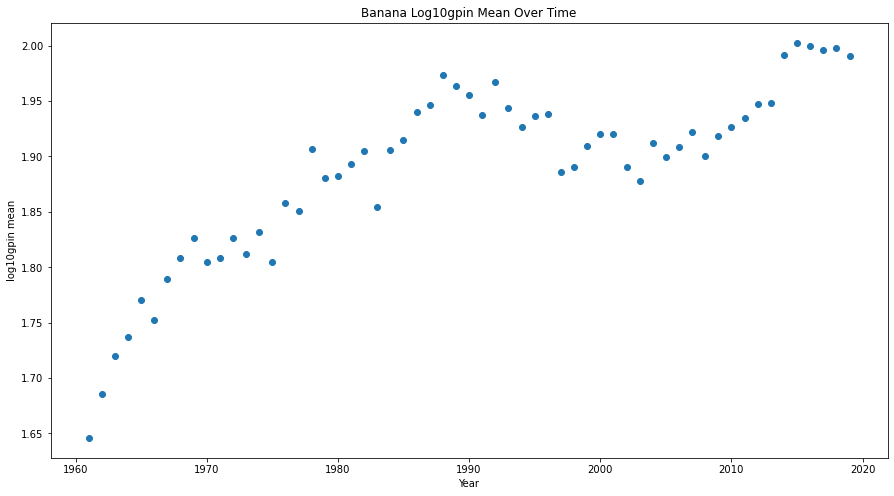

In [28]:

plt.figure(figsize=(15,8))

plt.scatter(banana_years, banana_mean)
plt.title("Banana Log10gpin Mean Over Time")
plt.xlabel("Year")
plt.ylabel("log10gpin mean")


    
    
    

    
    
    

#### 1.6

&#9989;&nbsp; For our last step, we want to fit a line to our mean log10gpin versus time plot. Do this using `polyfit`. Then use `poly1d` to make a line of best fit and plot the original data with the line of best fit. 

SHOULD NOT BE ON QUIZ

#### 1.7

&#9989;&nbsp; We can look at our line of best fit to get a sense of whether the log10gpin is increasing or decreasing in time. We can *also* get the same information by looking at the best fit parameters that we get from `polyfit`. Specifically, by looking at the slope of the line (the 1st value in your fit parameters). Print out your fit parameters. Does the slope indicate that log10gpin is increasing (positive slope) or decreasing (negative slope) in time?

SHOULD NOT BE ON QUIZ

SHOULD NOT BE ON QUIZ

## Part 2: Analyzing All Agricultural Commodities

In the previous part of this notebook, we laid out the steps for determining the rate of increase (best fit slope) for a *single* agricultural commodity. Now we're going to do the same analysis with *all* agricultural commodities.

#### 2.1

&#9989;&nbsp; Create a function that encapsulates all of the analysis you just did for a single commodity. That is, the function should take in a dataframe and the name of a commodity, and it should return the best fit slope for that commodity's change in log10gpin over time.


In [ ]:
# Write your code here


#### 2.2

&#9989;&nbsp; Test your function on the commodity that you used in part 1, and make sure that it returns the correct slope.

In [ ]:
# Write your code here

#### 2.3

&#9989;&nbsp; Create a list of all of the *unique* commodities. Using this list, create a `for` loop that calls your function and generates a list of the best fit slopes for all commodities.

**NOTE:** This code may take a while to run. If you find it's taking more than 20-30 seconds, you can instead just loop over the first 10-20 commodities instead of all of them.

In [ ]:
# Write your code here

#### 2.4

&#9989;&nbsp; You should now have a list of all of the unique commodoties as well as a list of the best fit slopes for their growth. Combine these two into a new dataframe (if you're unsure of how to do that, you can consult this [resource](https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/)). Once you've created your dataframe, use `describe` to ensure that it looks okay.



In [ ]:
# Write your code here

#### 2.5

&#9989;&nbsp; You should now be able to see what the growth rates are for all commodities. Use the dataframe you created in the previous part to figure out which commodity had the largest growth.

In [ ]:
# Write your code here

#### 2.6

&#9989;&nbsp; Now that you know the name of the fastest growing commodity, let's see what that growth actually looks like. Use the procedure that you used in parts 1.5 and 1.6 to create a plot showing the growth of log10gpin over time, as well as the best fit line.

In [ ]:
# Write your code here

#### 2.7

&#9989;&nbsp; What do you think caused this commodity to be the fastest growing?

*Write your response here*